In [1]:
import mlrose
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from textwrap import wrap


In [2]:
df = pd.read_csv('AP_Analytics.csv', delimiter=',', quotechar='"')
df= pd.get_dummies(df)

X = df.loc[:, df.columns != 'Chance of Admit ']
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# one_hot = OneHotEncoder(categories='auto')

# y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

y_train_hot = y_train
y_test_hot = y_test


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
np.random.seed(5)
# learning_rates = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
structure = [[10, 15, 10], [10, 10, 10]]
maxiter = [250, 500, 1000, 2000, 4000, 8000, 16000, 32000, 640000]#, 1100, 1200, 1300, 1400, 1500]
testError = []
trainError = []
print("start")
for mi in maxiter :
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13], activation ='sigmoid', 
                                 algorithm ='gradient_descent', 
                                 max_iters = mi, bias = True, is_classifier = True, 
                                 learning_rate = .0001, early_stopping = True)
    nn_model1.fit(X_train_scaled, y_train_hot)
    y_train_pred = nn_model1.predict(X_train_scaled)
    train_error = 1 - accuracy_score(y_train_hot, y_train_pred)
    trainError.append(train_error)
    y_test_pred = nn_model1.predict(X_test_scaled)
    test_error = 1 - accuracy_score(y_test_hot, y_test_pred)
    testError.append(test_error)
    print(mi, test_error)


start
250 0.2733333333333333
500 0.11333333333333329
1000 0.11333333333333329
2000 0.09999999999999998
4000 0.07333333333333336
8000 0.15333333333333332
16000 0.1266666666666667
32000 0.1333333333333333
640000 0.12


[0.2733333333333333, 0.11333333333333329, 0.11333333333333329, 0.09999999999999998, 0.07333333333333336, 0.15333333333333332, 0.1266666666666667, 0.1333333333333333, 0.12]


FileNotFoundError: [Errno 2] No such file or directory: 'BaseLinePics/MaxIterations9.png'

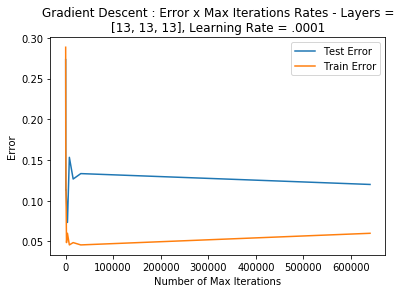

In [7]:
print(testError)
plt.figure()
title = "Gradient Descent : Error x Max Iterations Rates - Layers = [13, 13, 13], Learning Rate = .0001"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(maxiter, testError, '-', label='Test Error')
plt.plot(maxiter, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Number of Max Iterations')
plt.ylabel('Error')
filename = 'MaxIterations9.png'
plt.savefig("BaseLinePics/" + filename)